In [8]:
!pip install yfinance

In [9]:
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
import matplotlib.pyplot as plt


# Obtaining and Cleaning Data
The code in this section accesses each stock's historical data and cleans it. This includes selecting the desired data (closing prices), normalizes, and scaling the data. This is important for creating our training and testing data to help us build the model.

In [10]:
# IMPORT THE LIBRARY
import yfinance as yf
from datetime import datetime

# CREATE TICKER INSTANCE FOR AMAZON

#Make the end date the current day
end_date = datetime.now().strftime('%Y-%m-%d')

#Home Depot (HD)
hd = yf.Ticker("HD")
hd_hist = hd.history(start='2017-01-01',end=end_date)
print(hd_hist)

#Procter & Gamble (PG)
pg = yf.Ticker("PG")
pg_hist = pg.history(start='2017-01-01',end=end_date)
print(pg_hist)

#Mastercard Incorporated (MA)
ma = yf.Ticker("MA")
ma_hist = ma.history(start='2017-01-01',end=end_date)
print(ma_hist)

#PepsiCo (PEP)
pep = yf.Ticker("PEP")
pep_hist = pep.history(start='2017-01-01',end=end_date)
print(pep_hist)

#United Parcel Service
ups = yf.Ticker("UPS")
ups_hist = ups.history(start='2017-01-01',end=end_date)
print(ups_hist)

                                 Open        High         Low       Close  \
Date                                                                        
2017-01-03 00:00:00-05:00  113.495807  113.840233  112.227267  112.832130   
2017-01-04 00:00:00-05:00  112.857321  114.201466  112.748118  113.831825   
2017-01-05 00:00:00-05:00  113.394997  113.798249  112.386895  112.487701   
2017-01-06 00:00:00-05:00  112.546482  112.848914  111.773603  112.176842   
2017-01-09 00:00:00-05:00  111.916438  113.210167  111.849230  112.832130   
...                               ...         ...         ...         ...   
2024-05-09 00:00:00-04:00  339.250000  348.010010  338.880005  347.440002   
2024-05-10 00:00:00-04:00  347.459991  349.809998  344.700012  346.429993   
2024-05-13 00:00:00-04:00  348.059998  348.790009  340.399994  340.959991   
2024-05-14 00:00:00-04:00  335.049988  344.250000  333.000000  340.500000   
2024-05-15 00:00:00-04:00  345.179993  350.440002  344.690002  348.670013   

In [11]:
#This code stores the closing prices of every stock we are looking at into seperate arrays
#The data goes back to 2017

hd_close = hd_hist['Close']
hd_values = hd_close.values
hd_values = hd_values.reshape(-1,1)

pg_close = pg_hist['Close']
pg_values = pg_close.values
pg_values = pg_values.reshape(-1,1)

ma_close = ma_hist['Close']
ma_values = ma_close.values
ma_values = ma_values.reshape(-1,1)

pep_close = pep_hist['Close']
pep_values = pep_close.values
pep_values = pep_values.reshape(-1,1)

ups_close = ups_hist['Close']
ups_values = ups_close.values
ups_values = ups_values.reshape(-1,1)

In [12]:
#SCALING THE DATA

trainingScaler = MinMaxScaler(feature_range=(0,1))

hd_values_scaled = trainingScaler.fit_transform(hd_values)
print(len(hd_values_scaled))

pg_values_scaled = trainingScaler.fit_transform(pg_values)
print(len(pg_values_scaled))

ma_values_scaled = trainingScaler.fit_transform(ma_values)
print(len(ma_values_scaled))

pep_values_scaled = trainingScaler.fit_transform(pep_values)
print(len(pep_values_scaled))

ups_values_scaled = trainingScaler.fit_transform(ups_values)
print(len(ups_values_scaled))

1854
1854
1854
1854
1854


# Creating the Training Data
This section contains code that divides the data in preparation for training and prepares for predictions.

In [13]:
#CREATING TRAINING DATASETS

#85:15 split train to test
training_split = math.floor(len(hd_values_scaled) * 0.85) #1267+

training_hd = hd_values_scaled[0:training_split]
training_pg = pg_values_scaled[0:training_split]
training_ma = ma_values_scaled[0:training_split]
training_pep = pep_values_scaled[0:training_split]
training_ups = ups_values_scaled[0:training_split]

training_ind_hd = []
training_ind_pg = []
training_ind_ma = []
training_ind_pep = []
training_ind_ups = []

training_dep_hd = []
training_dep_pg = []
training_dep_ma = []
training_dep_pep = []
training_dep_ups = []


#Preparing Training Data

#Amazon
for i in range(50, len(training_hd)):
  training_ind_hd.append(training_hd[i-50:i][0])
  training_dep_hd.append(training_hd[i][0])

#Walmart
for i in range(50, len(training_pg)):
  training_ind_pg.append(pg_values_scaled[i-50:i][0])
  training_dep_pg.append(pg_values_scaled[i][0])

#Taiwan Semiconductor
for i in range(50, len(training_ma)):
  training_ind_ma.append(ma_values_scaled[i-50:i][0])
  training_dep_ma.append(ma_values_scaled[i][0])

#Advanced Micro Devices
for i in range(50, len(training_pep)):
  training_ind_pep.append(pep_values_scaled[i-50:i][0])
  training_dep_pep.append(pep_values_scaled[i][0])

#Tesla
for i in range(50, len(training_ups)):
  training_ind_ups.append(ups_values_scaled[i-50:i][0])
  training_dep_ups.append(ups_values_scaled[i][0])

training_ind_hd, training_dep_hd = np.array(training_ind_hd), np.array(training_dep_hd)
training_ind_hd = np.reshape(training_ind_hd, (training_ind_hd.shape[0], training_ind_hd.shape[1], 1))

training_ind_pg, training_dep_pg = np.array(training_ind_pg), np.array(training_dep_pg)
training_ind_pg = np.reshape(training_ind_pg, (training_ind_pg.shape[0], training_ind_pg.shape[1], 1))

training_ind_ma, training_dep_ma = np.array(training_ind_ma), np.array(training_dep_ma)
training_ind_ma = np.reshape(training_ind_ma, (training_ind_ma.shape[0], training_ind_ma.shape[1], 1))

training_ind_pep, training_dep_pep = np.array(training_ind_pep), np.array(training_dep_pep)
training_ind_pep = np.reshape(training_ind_pep, (training_ind_pep.shape[0], training_ind_pep.shape[1], 1))

training_ind_ups, training_dep_ups = np.array(training_ind_ups), np.array(training_dep_ups)
training_ind_ups = np.reshape(training_ind_ups, (training_ind_ups.shape[0], training_ind_ups.shape[1], 1))

# Network Architecture
This section contains the layers composing LSTM's architecture.

In [14]:
# hd model
hd_model = Sequential()
hd_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_hd.shape[1], 1)))
hd_model.add(Dropout(0.2))
hd_model.add(LSTM(100, return_sequences=True))
hd_model.add(Dropout(0.2))
hd_model.add(LSTM(100))
hd_model.add(Dropout(0.2))
hd_model.add(Dense(25))
hd_model.add(Dense(1))
hd_model.compile(optimizer='adam',loss='mean_squared_error')
hd_model.fit(training_ind_hd, training_dep_hd, epochs = 60, batch_size = 32)

# pg model
pg_model = Sequential()
pg_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_pg.shape[1], 1)))
pg_model.add(Dropout(0.2))
pg_model.add(LSTM(100, return_sequences=True))
pg_model.add(Dropout(0.2))
pg_model.add(LSTM(100))
pg_model.add(Dropout(0.2))
pg_model.add(Dense(25))
pg_model.add(Dense(1))
pg_model.compile(optimizer='adam',loss='mean_squared_error')
pg_model.fit(training_ind_pg, training_dep_pg, epochs = 60, batch_size = 32)

# ma model
ma_model = Sequential()
ma_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_ma.shape[1], 1)))
ma_model.add(Dropout(0.2))
ma_model.add(LSTM(100, return_sequences=True))
ma_model.add(Dropout(0.2))
ma_model.add(LSTM(100))
ma_model.add(Dropout(0.2))
ma_model.add(Dense(25))
ma_model.add(Dense(1))
ma_model.compile(optimizer='adam',loss='mean_squared_error')
ma_model.fit(training_ind_ma, training_dep_ma, epochs = 60, batch_size = 32)

# pep model
pep_model = Sequential()
pep_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_pep.shape[1], 1)))
pep_model.add(Dropout(0.2))
pep_model.add(LSTM(100, return_sequences=True))
pep_model.add(Dropout(0.2))
pep_model.add(LSTM(100))
pep_model.add(Dropout(0.2))
pep_model.add(Dense(25))
pep_model.add(Dense(1))
pep_model.compile(optimizer='adam',loss='mean_squared_error')
pep_model.fit(training_ind_pep, training_dep_pep, epochs = 60, batch_size = 32)

# ups model
ups_model = Sequential()
ups_model.add(LSTM(100, return_sequences=True, input_shape=(training_ind_ups.shape[1], 1)))
ups_model.add(Dropout(0.2))
ups_model.add(LSTM(100, return_sequences=True))
ups_model.add(Dropout(0.2))
ups_model.add(LSTM(100))
ups_model.add(Dropout(0.2))
ups_model.add(Dense(25))
ups_model.add(Dense(1))
ups_model.compile(optimizer='adam',loss='mean_squared_error')
ups_model.fit(training_ind_ups, training_dep_ups, epochs = 60, batch_size = 32)

Epoch 1/60
48/48 [==============================] - 16s 19ms/step - loss: 0.0753
Epoch 2/60
48/48 [==============================] - 1s 14ms/step - loss: 0.0129
Epoch 3/60
48/48 [==============================] - 1s 13ms/step - loss: 0.0094
Epoch 4/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0094
Epoch 5/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0097
Epoch 6/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0089
Epoch 7/60
48/48 [==============================] - 1s 15ms/step - loss: 0.0087
Epoch 8/60
48/48 [==============================] - 1s 14ms/step - loss: 0.0084
Epoch 9/60
48/48 [==============================] - 1s 17ms/step - loss: 0.0079
Epoch 10/60
48/48 [==============================] - 1s 17ms/step - loss: 0.0082
Epoch 11/60
48/48 [==============================] - 1s 18ms/step - loss: 0.0082
Epoch 12/60
48/48 [==============================] - 1s 21ms/step - loss: 0.0083
Epoch 13/60
48/48 [=================

# Testing and Evaluating the Model
This section takes makes predictions and learns using the testing data. The predictions are then visualized.

In [15]:
#TESTING DATASET PREPARATION
# hd
testing_input_hd = hd_values[training_split:]
testing_input_hd = trainingScaler.fit_transform(testing_input_hd)
testing_hd = []
for i in range(50, len(testing_input_hd) + 50):
  testing_hd.append(testing_input_hd[i-50:i][0])
testing_hd = np.array(testing_hd)
testing_hd = np.reshape(testing_hd, (testing_hd.shape[0], testing_hd.shape[1], 1))
predict_hd = hd_model.predict(testing_hd)
predict_hd = trainingScaler.inverse_transform(predict_hd)

# pg
testing_input_pg = pg_values[training_split:]
testing_input_pg = trainingScaler.fit_transform(testing_input_pg)
testing_pg = []
for i in range(50, len(testing_input_pg) + 50):
  testing_pg.append(testing_input_pg[i-50:i][0])
testing_pg = np.array(testing_pg)
testing_pg = np.reshape(testing_pg, (testing_pg.shape[0], testing_pg.shape[1], 1))
predict_pg = pg_model.predict(testing_pg)
predict_pg = trainingScaler.inverse_transform(predict_pg)

# ma
testing_input_ma = ma_values[training_split:]
testing_input_ma = trainingScaler.fit_transform(testing_input_ma)
testing_ma = []
for i in range(50, len(testing_input_ma) + 50):
  testing_ma.append(testing_input_ma[i-50:i][0])
testing_ma = np.array(testing_ma)
testing_ma = np.reshape(testing_ma, (testing_ma.shape[0], testing_ma.shape[1], 1))
predict_ma = ma_model.predict(testing_ma)
predict_ma = trainingScaler.inverse_transform(predict_ma)

# pep
testing_input_pep = pep_values[training_split:]
testing_input_pep = trainingScaler.fit_transform(testing_input_pep)
testing_pep = []
for i in range(50, len(testing_input_pep) + 50):
  testing_pep.append(testing_input_pep[i-50:i][0])
testing_pep = np.array(testing_pep)
testing_pep = np.reshape(testing_pep, (testing_pep.shape[0], testing_pep.shape[1], 1))
predict_pep = pep_model.predict(testing_pep)
predict_pep = trainingScaler.inverse_transform(predict_pep)

# ups
testing_input_ups = ups_values[training_split:]
testing_input_ups = trainingScaler.fit_transform(testing_input_ups)
testing_ups = []
for i in range(50, len(testing_input_ups) + 50):
  testing_ups.append(testing_input_ups[i-50:i][0])
testing_ups = np.array(testing_ups)
testing_ups = np.reshape(testing_ups, (testing_ups.shape[0], testing_ups.shape[1], 1))
predict_ups = ups_model.predict(testing_ups)
predict_ups = trainingScaler.inverse_transform(predict_ups)

9/9 [==============================] - 2s 4ms/step


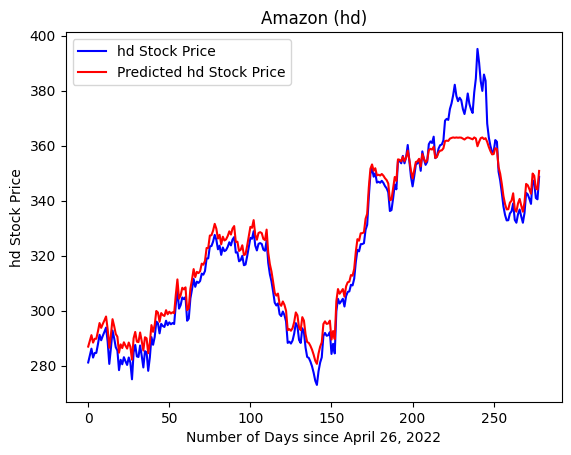

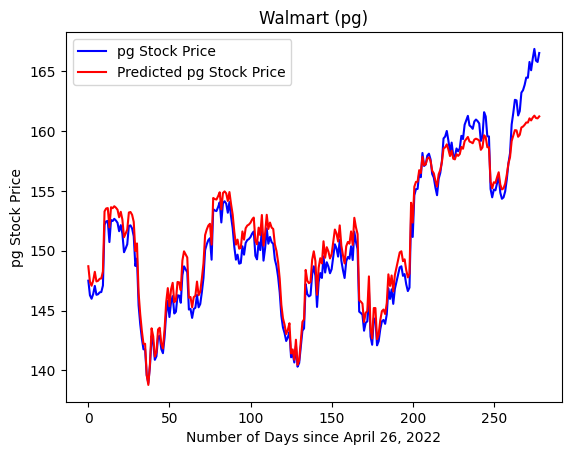

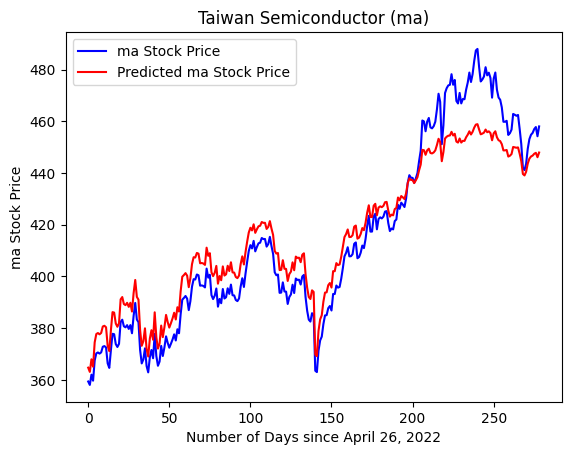

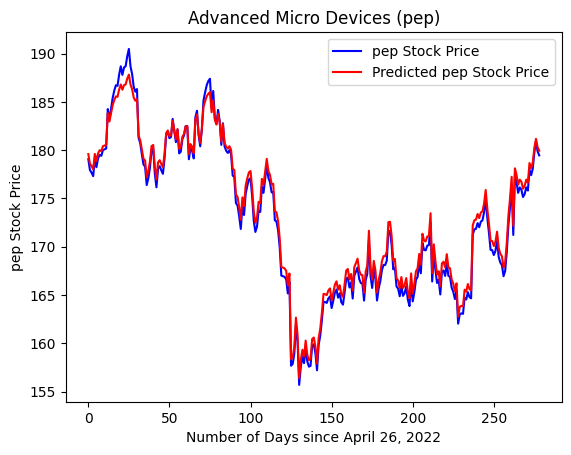

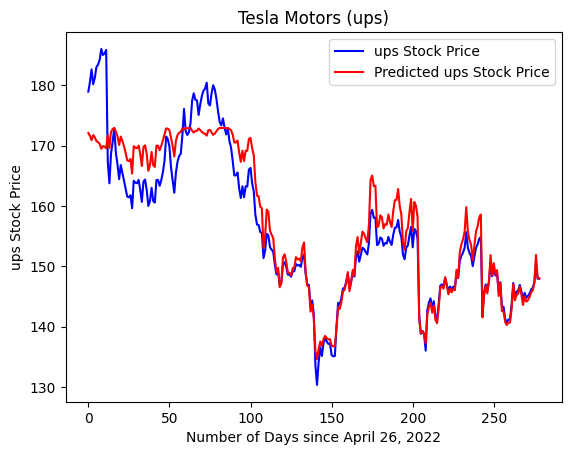

In [16]:
# hd
plt.plot(hd_values[training_split:], color = 'blue', label = 'hd Stock Price')
plt.plot(predict_hd, color = 'red', label = 'Predicted hd Stock Price')
plt.title('Amazon (hd)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('hd Stock Price')
plt.legend()
plt.show()

# pg
plt.plot(pg_values[training_split:], color = 'blue', label = 'pg Stock Price')
plt.plot(predict_pg, color = 'red', label = 'Predicted pg Stock Price')
plt.title('Walmart (pg)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('pg Stock Price')
plt.legend()
plt.show()

# ma
plt.plot(ma_values[training_split:], color = 'blue', label = 'ma Stock Price')
plt.plot(predict_ma, color = 'red', label = 'Predicted ma Stock Price')
plt.title('Taiwan Semiconductor (ma)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('ma Stock Price')
plt.legend()
plt.show()

# pep
plt.plot(pep_values[training_split:], color = 'blue', label = 'pep Stock Price')
plt.plot(predict_pep, color = 'red', label = 'Predicted pep Stock Price')
plt.title('Advanced Micro Devices (pep)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('pep Stock Price')
plt.legend()
plt.show()

# ups
plt.plot(ups_values[training_split:], color = 'blue', label = 'ups Stock Price')
plt.plot(predict_ups, color = 'red', label = 'Predicted ups Stock Price')
plt.title('Tesla Motors (ups)')
plt.xlabel('Number of Days since April 26, 2022')
plt.ylabel('ups Stock Price')
plt.legend()
plt.show()

# Evaluation
We use statistics to measure the accuracy and error of each model in this section.

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Mean absolute percentage error
hd_error = mean_absolute_percentage_error(hd_values[training_split:], predict_hd)
pg_error = mean_absolute_percentage_error(pg_values[training_split:], predict_pg)
ma_error = mean_absolute_percentage_error(ma_values[training_split:], predict_ma)
pep_error = mean_absolute_percentage_error(pep_values[training_split:], predict_pep)
ups_error = mean_absolute_percentage_error(ups_values[training_split:], predict_ups)

print("Mean Average Percentage Errors")
print("hd: " + str(hd_error * 100) + "%")
print("pg: " + str(pg_error * 100) + "%")
print("ma: " + str(ma_error * 100) + "%")
print("pep: " + str(pep_error * 100) + "%")
print("ups: " + str(ups_error * 100) + "% \n")

# Root of Mean Square Errors
hd_rmse = math.sqrt(mean_squared_error(hd_values[training_split:], predict_hd))
pg_rmse = math.sqrt(mean_squared_error(pg_values[training_split:], predict_pg))
ma_rmse = math.sqrt(mean_squared_error(ma_values[training_split:], predict_ma))
pep_rmse = math.sqrt(mean_squared_error(pep_values[training_split:], predict_pep))
ups_rmse = math.sqrt(mean_squared_error(ups_values[training_split:], predict_ups))

print("Root of Mean Square Errors")
print("hd: " + str(hd_rmse))
print("pg: " + str(pg_rmse))
print("ma: " + str(ma_rmse))
print("pep: " + str(pep_rmse))
print("ups: " + str(ups_rmse) + "\n")

hd_day_count = 0
for day in range(len(predict_hd)):
  if hd_values[training_split + day] > hd_values[training_split + day-1] and predict_hd[day] > predict_hd[day - 1]:
    hd_day_count += 1
  elif hd_values[training_split + day] < hd_values[training_split + day-1] and predict_hd[day] < predict_hd[day - 1]:
    hd_day_count += 1
  elif hd_values[training_split + day] == hd_values[training_split + day-1] and predict_hd[day] == predict_hd[day - 1]:
    hd_day_count += 1

pg_day_count = 0
for day in range(len(predict_pg)):
  if pg_values[training_split + day] > pg_values[training_split + day-1] and predict_pg[day] > predict_pg[day - 1]:
    pg_day_count += 1
  elif pg_values[training_split + day] < pg_values[training_split + day-1] and predict_pg[day] < predict_pg[day - 1]:
    pg_day_count += 1
  elif pg_values[training_split + day] == pg_values[training_split + day-1] and predict_pg[day] == predict_pg[day - 1]:
    pg_day_count += 1

ma_day_count = 0
for day in range(len(predict_ma)):
  if ma_values[training_split + day] > ma_values[training_split + day-1] and predict_ma[day] > predict_ma[day - 1]:
    ma_day_count += 1
  elif ma_values[training_split + day] < ma_values[training_split + day-1] and predict_ma[day] < predict_ma[day - 1]:
    ma_day_count += 1
  elif ma_values[training_split + day] == ma_values[training_split + day-1] and predict_ma[day] == predict_ma[day - 1]:
    ma_day_count += 1

pep_day_count = 0
for day in range(len(predict_pep)):
  if pep_values[training_split + day] > pep_values[training_split + day-1] and predict_pep[day] > predict_pep[day - 1]:
    pep_day_count += 1
  elif pep_values[training_split + day] < pep_values[training_split + day-1] and predict_pep[day] < predict_pep[day - 1]:
    pep_day_count += 1
  elif pep_values[training_split + day] == pep_values[training_split + day-1] and predict_pep[day] == predict_pep[day - 1]:
    pep_day_count += 1

ups_day_count = 0
for day in range(len(predict_ups)):
  if ups_values[training_split + day] > ups_values[training_split + day-1] and predict_ups[day] > predict_ups[day - 1]:
    ups_day_count += 1
  elif ups_values[training_split + day] < ups_values[training_split + day-1] and predict_ups[day] < predict_ups[day - 1]:
    ups_day_count += 1
  elif ups_values[training_split + day] == ups_values[training_split + day-1] and predict_ups[day] == predict_ups[day - 1]:
    ups_day_count += 1

print("Percentage of days with correct predicted direction of stock")
print("hd: " + str(hd_day_count/len(predict_hd) * 100) + "%")
print("pg: " + str(pg_day_count/len(predict_pg) * 100) + "%")
print("ma: " + str(ma_day_count/len(predict_ma) * 100) + "%")
print("pep: " + str(pep_day_count/len(predict_pep) * 100) + "%")
print("ups: " + str(ups_day_count/len(predict_ups) * 100) + "%")

Mean Average Percentage Errors
hd: 1.4860120535730912%
pg: 0.7302889334577659%
ma: 2.19569297181252%
pep: 0.45023447086907703%
ups: 1.8586081201735802% 

Root of Mean Square Errors
hd: 6.379738108493577
pg: 1.3651811323207568
ma: 10.467085249200768
pep: 0.8398527297591343
ups: 4.276281742156388

Percentage of days with correct predicted direction of stock
hd: 96.7741935483871%
pg: 99.6415770609319%
ma: 100.0%
pep: 99.6415770609319%
ups: 87.09677419354838%
